In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
dbFile = 'baseline_v1.4_10yrs.db'
# This connection checks which version it thinks the database is and should do the right thing schema-wise
conn = db.OpsimDatabase(dbFile)
outDir='temp'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []
sql = 'filter="g" and night < 180'
metric = metrics.DcrPrecisionMetric(rmag=24)
slicer = slicers.HealpixSlicer()
plotDict = {'colorMax': 0.1}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying database SummaryAllProps with constraint filter="g" and night < 180 for columns ['filter', 'fieldDec', 'seeingFwhmGeom', 'altitude', 'fieldRA', 'observationStartLST', 'paraAngle', 'fiveSigmaDepth']
Found 10164 visits
Running:  ['opsim_DCRprecision_g_and_night_lt_180_HEAL']


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:127: UserWarning: Warning - column zenithDistance already present in simData, may be overwritten (depending on stacker).
  % (col))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="g" and night < 180" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 674 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.113573  dipole: lon: -88.7726, lat: 17.9519, amp: 0.0697993
Plotting complete.


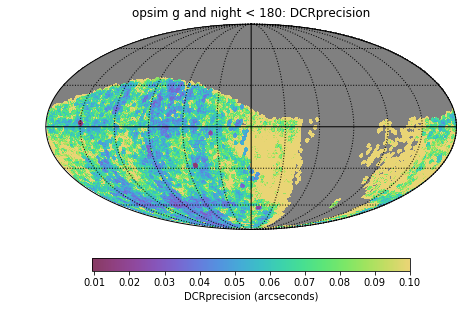

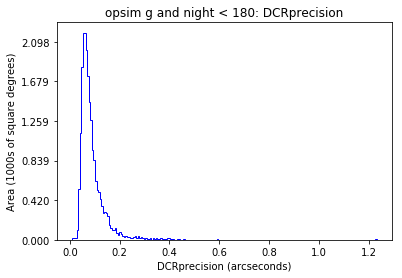

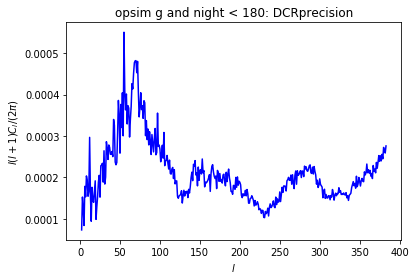

In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)

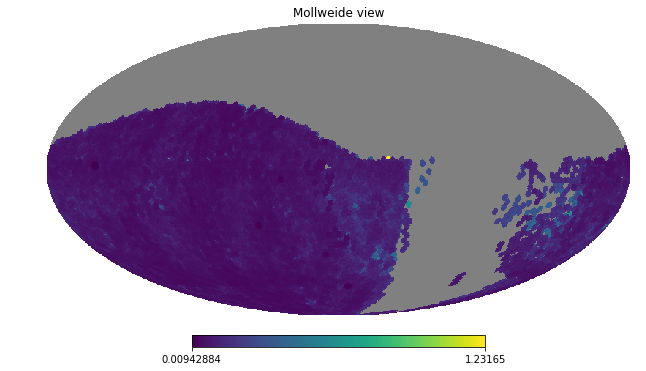

In [5]:
hp.mollview(bundleList[0].metricValues)

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database SummaryAllProps with constraint filter="g" for columns ['filter', 'fieldDec', 'seeingFwhmGeom', 'altitude', 'fieldRA', 'observationStartLST', 'paraAngle', 'fiveSigmaDepth']
Found 209798 visits
Running:  ['opsim_DCRprecision_g_HEAL']


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/stackers/baseStacker.py:127: UserWarning: Warning - column zenithDistance already present in simData, may be overwritten (depending on stacker).
  % (col))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "filter="g"" constraint now.


/Users/yoachim/git_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 5385 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


monopole: 0.0267109  dipole: lon: -80.8308, lat: 55.3801, amp: 0.00904213
Plotting complete.


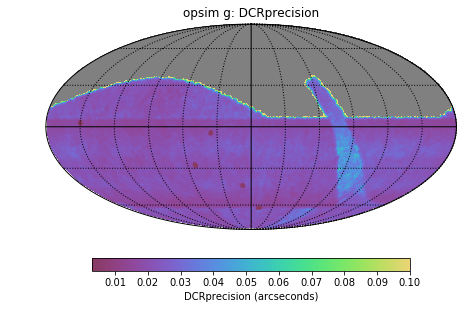

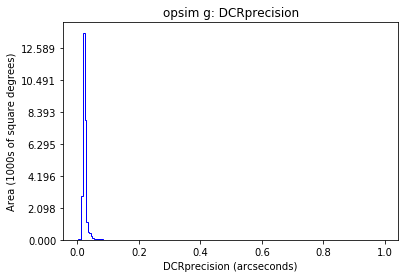

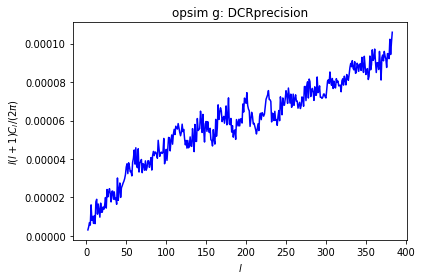

In [6]:
bundleList = []
sql = 'filter="g"'
metric = metrics.DcrPrecisionMetric(rmag=24)
slicer = slicers.HealpixSlicer()
plotDict = {'colorMax': 0.1}
bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict))

bd = metricBundles.makeBundlesDictFromList(bundleList)
bg = metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

bg.plotAll(closefigs=False)
